In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

results = pd.read_csv('results.csv')
results.head(10)

In [ ]:
results['year'] = pd.to_numeric([date.split('-')[0] for date in results['date']])
results['month'] = pd.to_numeric([date.split('-')[1] for date in results['date']])
results['day'] = pd.to_numeric([date.split('-')[2] for date in results['date']])

def find_winners(df):
    winners = []
    for i, row in df.iterrows():
        if row['home_team'] > row['away_team']:
            winners.append(row['home_team'])
        elif row['home_team'] < row['away_team']:
            winners.append(row['away_team'])
        else:
            winners.append('Draw')
    return winners
results['winner'] = find_winners(results)
results.head()

In [ ]:
neutral = []
for index, row in results.iterrows():
    neutral.append((row['country'] not in  row['home_team']) and (row['home_team'] != 'USA'))
    
results['neutral'] = neutral
results['neutral'] = results['neutral'].astype(int)

results.head()

In [ ]:
cities = pd.read_csv('worldcitiespop.csv', encoding='latin-1', dtype={
    'Country': str,
    'City': str,
    'AccentCity': str,
    'Region': str
})
cities = cities.dropna()
cities = cities[['Country', 'AccentCity', 'Latitude', 'Longitude']]
cities.head()

In [ ]:
countries = pd.read_csv('countries and continents.csv')
countries = countries.rename(columns = {'official_name_en': 'Name', 'ISO3166-1-Alpha-2': 'Code'})
countries = countries[['Name', 'Code']]
countries['Code'] = countries['Code'].str.lower()

In [ ]:
coords = results[['city', 'country']]
df = coords.merge(cities, how='inner', left_on='city', right_on='AccentCity')
new_df = df.merge(countries, how='left', left_on='Country', right_on='Code')
city_coords = new_df[['city', 'Latitude', 'Longitude']]
city_coords = city_coords.drop_duplicates('city')
city_coords = city_coords.rename(columns={'Latitude':'latitude', 'Longitude': 'longitude'})

In [ ]:
new_results = results.merge(city_coords, how='left', on='city')
new_results.head()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

lat_min = min(new_results['latitude'])
lat_max = max(new_results['latitude'])
lon_min = min(new_results['longitude'])
lon_max = max(new_results['longitude'])

m = Basemap(
    projection='merc', 
    llcrnrlat=lat_min, 
    urcrnrlat=lat_max, 
    llcrnrlon=lon_min, 
    urcrnrlon=lon_max,
    resolution='l'
)


longitudes = new_results['longitude'].tolist()
latitudes = new_results['latitude'].tolist()
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(1,1,1)
ax = m.drawcountries()
ax = m.drawcoastlines()
ax = m.fillcontinents(color='#eadf93')
ax = m.drawmapboundary()
ax = m.scatter(longitudes, latitudes, s=25, zorder=2, latlon=True, color='#0e3bef')

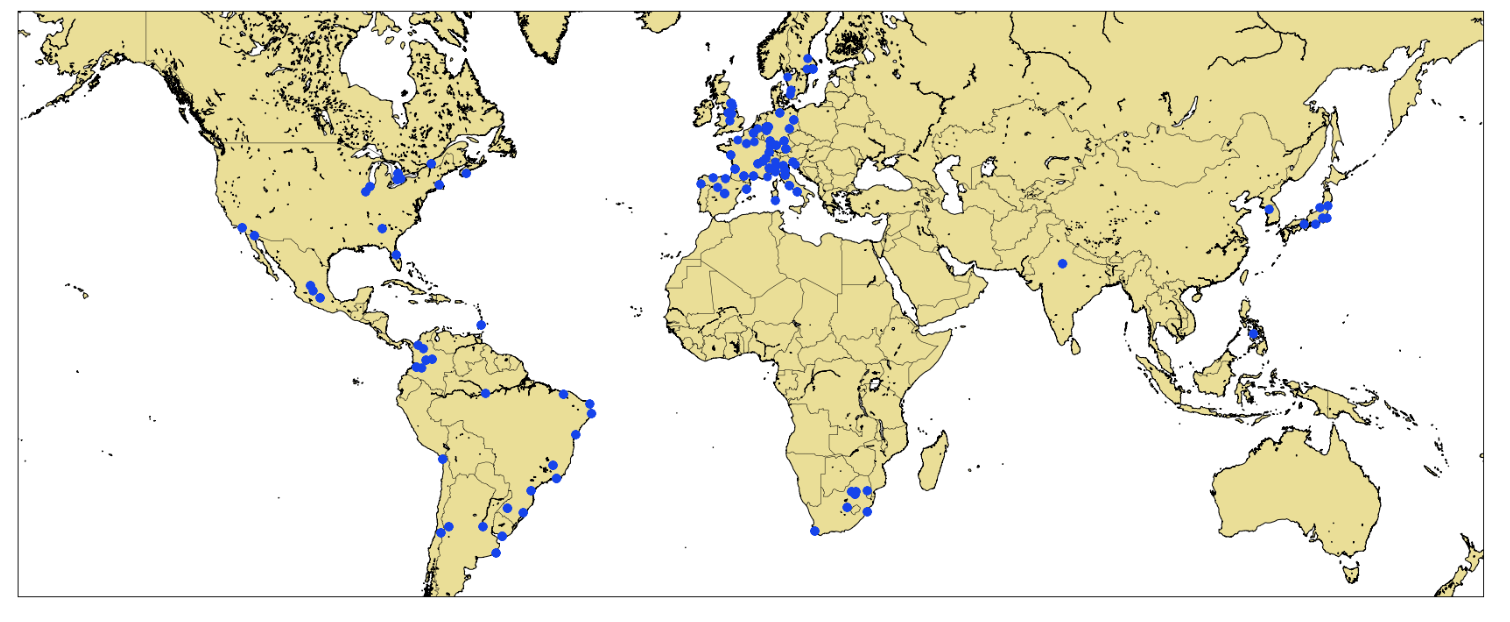